Following tutorial at
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import csv

# PCA analysis

In [2]:

items = ["madhouse", "asylum"]
tokens = []
with open('../../abstract_bert/data/derived/bnc_words_with_context_tokens_and_vectors.csv', mode="r") as infile:
    # word sentence concreteness vector
    reader = csv.reader(infile, delimiter="\t")
    for row in reader:
        word = row[0]
        if word.lower() in items:
            tokens.append(row)
print("number of data points: %s" % len(tokens))              
                
data = pd.DataFrame.from_records(tokens, columns=["word", "text", "concreteness", "vector"])
data["vector"] = data["vector"].apply(lambda x: np.fromstring(x[1:-1], dtype=np.float, sep=' '))

print(data)

print('Size of the dataframe: {}'.format(data.shape))

number of data points: 44
        word                                               text concreteness  \
0     asylum  This was the plea of a young Eritrean boy as h...         4.41   
1     asylum  Prior to this incident , in April 1990 three S...         4.41   
2     asylum  Other cases are known to Amnesty International...         4.41   
3     asylum  Other cases are known to Amnesty International...         4.41   
4     asylum  What has forced airline staff to take on this ...         4.41   
5     asylum  The fining of airlines plus the fact that the ...         4.41   
6     asylum  Instead of introducing procedures which can be...         4.41   
7     asylum  During the period of 1984–5 , more than 2,800 ...         4.41   
8     asylum  Subsequently in June 1989 a visa requirement w...         4.41   
9     asylum  In 1989 more than 2,600 Somalis sought asylum ...         4.41   
10    asylum  In April 1991 a visa requirement was imposed o...         4.41   
11    asylum  

In [3]:

X = data['vector']
X = X.to_list()
y = data['word']
contexts = data['text']

feat_cols = [ 'dimension'+str(i) for i in range(len(X[0])) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
df['context'] = contexts

X, y = None, None 

print('Size of the dataframe: {}'.format(df.shape))

    
# vectors = df.get("vector")
# x = vectors.to_numpy()
# x = x.tolist()
# all_vectors = all_vectors + x
# # TSNE analysis

# model = TSNE(n_components=2, random_state=0)
# res = model.fit_transform(all_vectors)
# return res

Size of the dataframe: (44, 771)


In [4]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.22194945 0.19312167 0.07073489]


NameError: name 'p1' is not defined

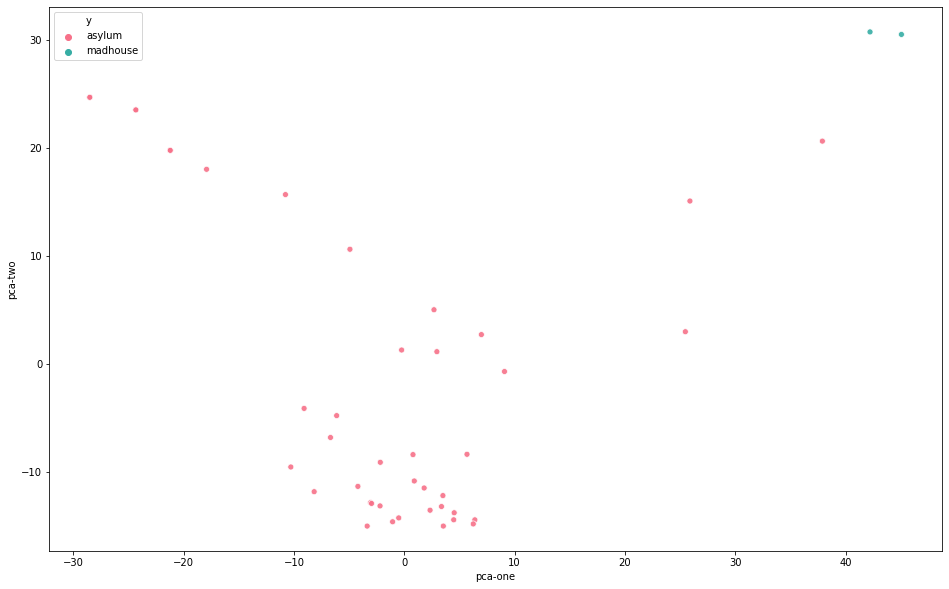

In [5]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("husl", 2),
    data=df,
    legend="full",
    alpha=0.9
)

for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

In [ ]:
# attempt to get annotations in 2d pca
import textwrap

plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("husl", 2),
    data=df,
    legend="full",
    alpha=0.9
)

for line in range(0,df.shape[0]):
    if line % 1 == 0:
        text = df.context[line]
        text = textwrap.wrap(text, width=40)
        text = '\n'.join(text)
        p1.text(df["pca-one"][line]+0.2, df["pca-two"][line], text, horizontalalignment='left', size='medium', color='black', weight='semibold')
        


In [ ]:
# attempt to get annotations in 3d pca

from mpldatacursor import datacursor

# Using a closure to access data. Ideally you'd use a "functor"-style class.
def formatter(**kwargs):
    return "10"

ax = plt.figure(figsize=(16,10)).gca(projection='3d')

ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"].apply(lambda i: 0 if i=="rook" else 1), 
    cmap='Accent'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

datacursor(formatter=formatter, hover=True)

plt.show()

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"].apply(lambda i: 0 if i=="democracy" else 1), 
    cmap='Accent'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# TSNE 

In [ ]:
data_subset = df[feat_cols].values


time_start = time.time()
# use low perplexity because N is very small
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.9
)

for line in range(0,df.shape[0]):
    if line % 1 == 0:
        text = df.context[line]
        text = textwrap.wrap(text, width=40)
        text = '\n'.join(text)
        #p1.text(df["tsne-2d-one"][line]+0.2, df["tsne-2d-two"][line], text, horizontalalignment='left', size='medium', color='black', weight='semibold')
       